In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ruta al archivo CSV
archivo_csv = "diabetes.csv"

# Leer el archivo CSV utilizando Pandas
datos = pd.read_csv(archivo_csv)


selected_columns = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']  # Add your desired column names

for col in selected_columns:
    # Calculate the mean of non-zero values in the column
    mean_val = datos.loc[datos[col] != 0, col].mean()
   

    # Replace 0 values with the mean
    datos[col] = datos[col].replace(0, mean_val)



# Análisis del dataset

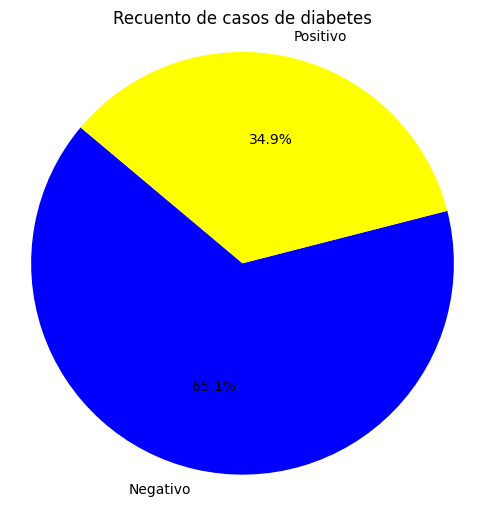

In [27]:
# Contar el número de ceros y unos en la columna 'Columna'
counts = datos['Outcome'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Negativo', 'Positivo'], colors=['blue', 'yellow'], autopct='%1.1f%%', startangle=140)
plt.title('Recuento de casos de diabetes')
plt.axis('equal')  # Ajustar el aspecto del círculo
plt.show()

# Análisis de features

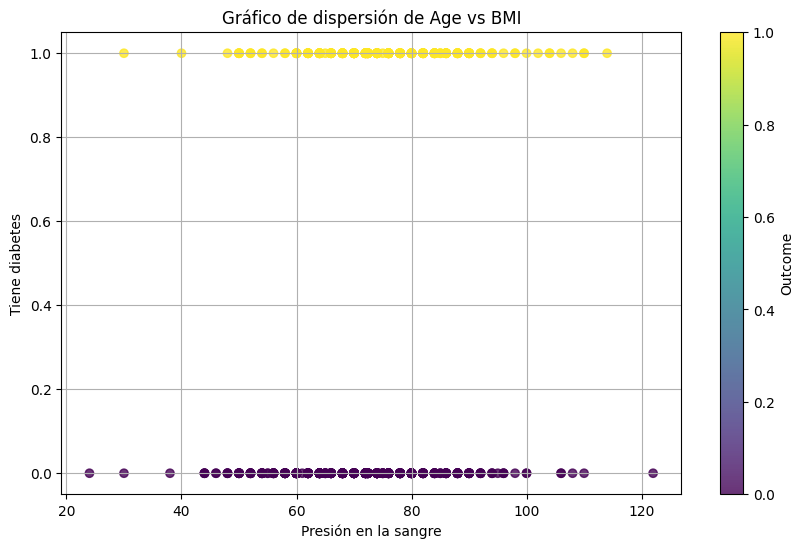

In [28]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['BloodPressure'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de Age vs BMI')
plt.xlabel('Presión en la sangre')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

En el gráfico anterior se puede apreciar una ligera disminución de personas con diabetes con la presión baja y un ligero incremento de personas con diabetes con la presión alta.

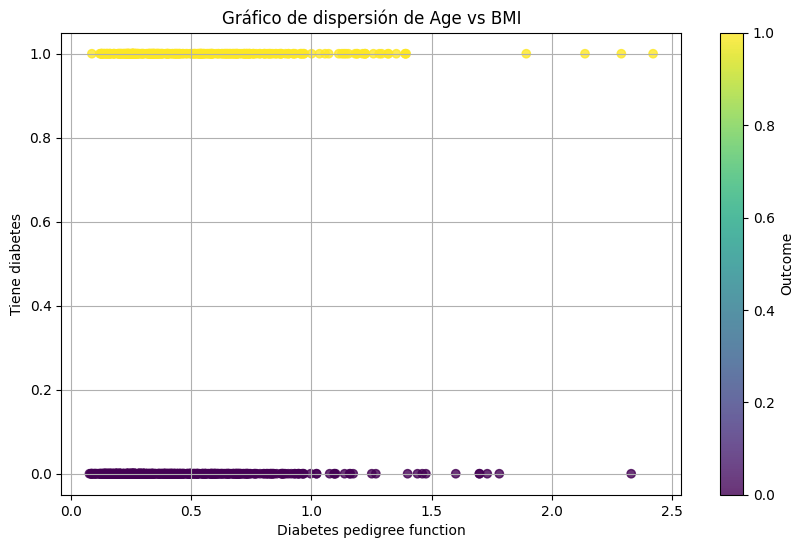

In [29]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['DiabetesPedigreeFunction'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de Age vs BMI')
plt.xlabel('Diabetes pedigree function')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo, realmente no se puede interpretar algun comportamientos que nos ayude a predecir si una persona tiene o no diabetes.

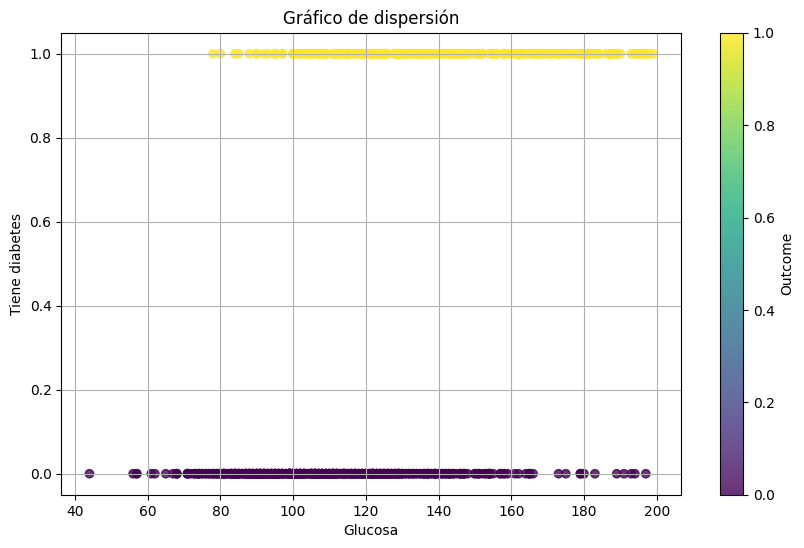

In [30]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Glucose'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Glucosa')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Similar al gráfico de la presión en la sangre pero acá es más marcado la diminución en niveles bajos y un ligero incremento en niveles altos, esta parece la mejor feature.

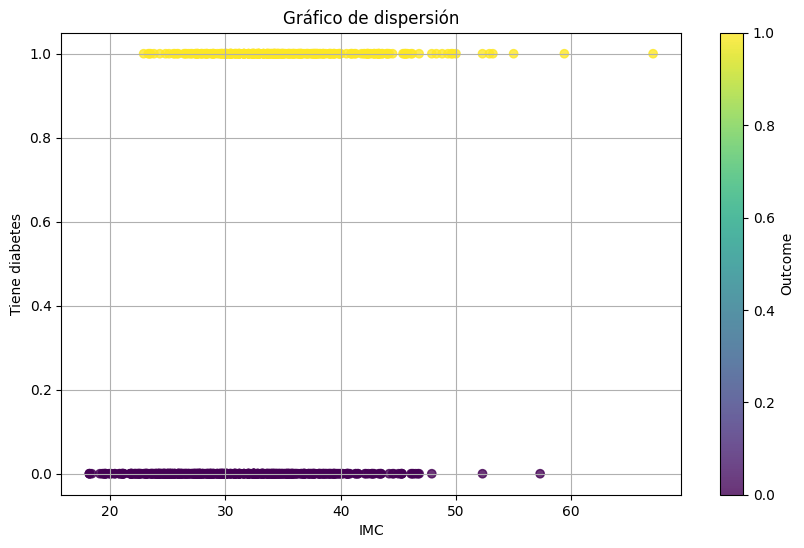

In [31]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['BMI'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('IMC')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Igual que el gráfico de la glucosa, este feature es un buen canditado también.

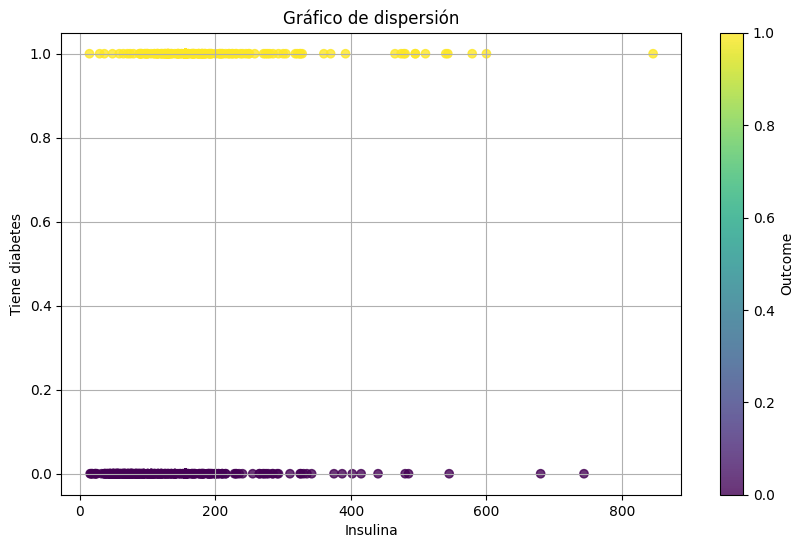

In [32]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Insulin'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Insulina')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

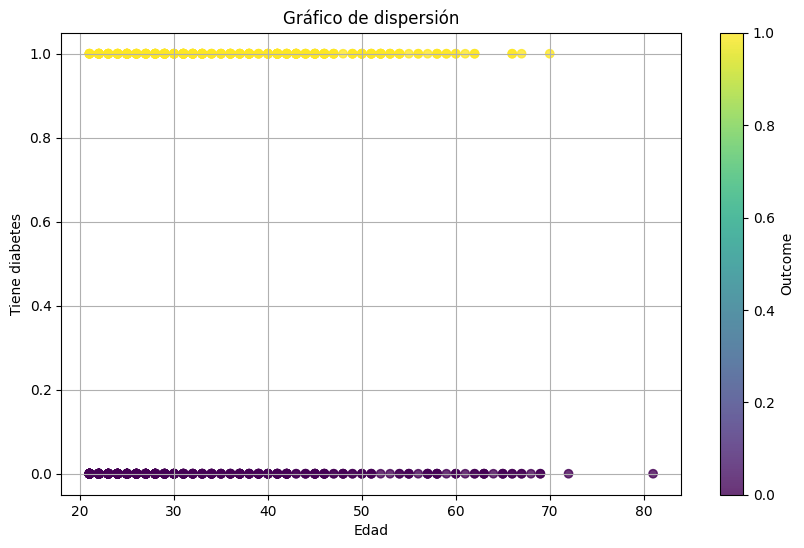

In [33]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Age'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Edad')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

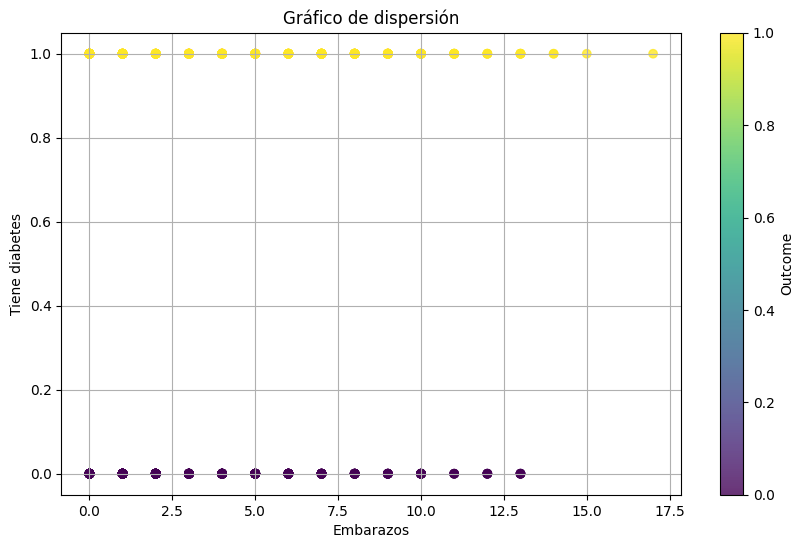

In [34]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Pregnancies'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Embarazos')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

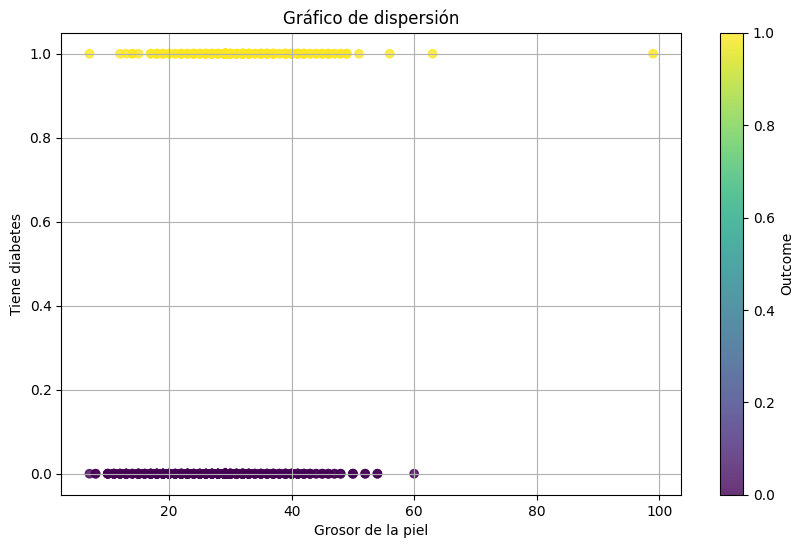

In [35]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['SkinThickness'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Grosor de la piel')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Pareciera haber un comportamiento similar al gráfico de la presión en la sangre.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


features=["Glucose","BMI","BloodPressure","SkinThickness"]

for elemento in features:

    X = datos[[elemento]]
    y = datos['Outcome']

    # Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Incializar el modelo
    model = LogisticRegression()

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con el feature: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

Resultados del modelo con el feature:  Glucose
Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
[[86 13]
 [25 30]] 

Resultados del modelo con el feature:  BMI
Accuracy: 0.6558441558441559

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        99
           1       0.54      0.24      0.33        55

    accuracy                           0.66       154
   macro avg       0.61      0.56      0.55       154
weighted avg       0.63      0.66      0.61       154


Confusion Matrix:
[[88 11]
 [42 13]] 

Resultados del modelo con el feature:  BloodPressure
Accuracy: 0.64285

C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

# Pruebas con datos normalizados

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las características a normalizar (por ejemplo, todas las columnas)
features_to_normalize = datos.columns.difference(["Outcome"])

datos_normalizados=pd.DataFrame(scaler.fit_transform(datos[features_to_normalize]), columns=features_to_normalize)

datos_normalizados["Outcome"]=datos["Outcome"]


for elemento in features:

    X = datos_normalizados[[elemento]]
    y = datos_normalizados['Outcome']

    # Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Incializar el modelo
    model = LogisticRegression()

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con el feature: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

Resultados del modelo con el feature:  Glucose
Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.74      0.47      0.58        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154


Confusion Matrix:
[[90  9]
 [29 26]] 

Resultados del modelo con el feature:  BMI
Accuracy: 0.6688311688311688

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.99      0.79        99
           1       0.83      0.09      0.16        55

    accuracy                           0.67       154
   macro avg       0.75      0.54      0.48       154
weighted avg       0.72      0.67      0.57       154


Confusion Matrix:
[[98  1]
 [50  5]] 

Resultados del modelo con el feature:  BloodPressure
Accuracy: 0.64285

C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.